# Programmeren 2.1

## Les 2.1 -- Functies en de **math** en **random** modules.


## Inhoud
- Het **math** package
- Het **random** package
- Zelf functies schrijven
- Programmeerstijl

## Het **math** package

Vorige week hebben we gezien hoe we Python als rekenmachine kunnen gebruiken:
- Optellen
- Aftrekken
- Vermenigvuldigen
- (Geheeltallig) Delen
- Machten en Wortels

Maar we missen nog de goniometrische, en veel andere, functies. Deze functies staan in het **math** package. De volledige documentatie (alle functies in **math**) staat op:
[https://docs.python.org/3.9/library/math.html](https://docs.python.org/3.9/library/math.html).

We kunnen de functies en variabelen uit het **math** package beschikbaar maken door onze code te beginnen met een **import**.

In [60]:
import math

Documentatie voor het math package is nu ook beschikbaar met het **help** commando.

In [61]:
help(math.cos)

Help on built-in function cos in module math:

cos(x, /)
    Return the cosine of x (measured in radians).



De functies uit het **math** package roepen we aan met **math.\<functie naam\>**. So kunnen we bijvoorbeeld de cosinus, sinus en tangens van $\frac{\pi}{6}$ berekenen. Vanuit de calculus weten we dat deze gelijk moeten zijn aan $\frac{\sqrt{3}}{2}$, $\frac{1}{2}$ en $\frac{1}{\sqrt{3}}$.

In [62]:
x = math.pi/6
y1 = math.cos(x)
y2 = math.sin(x)
y3 = math.tan(x)

# Print waardes en controle
print(y1, y2, y3)
print(3**(1/2)/2, 1/2, 3**(-1/2))

0.8660254037844387 0.49999999999999994 0.5773502691896256
0.8660254037844386 0.5 0.5773502691896257


Als je maar een klein aantal functies uit **math** nodig hebt, kan je met het **from** commando ook expliciet aangeven welke functies je wilt hebben, in dit geval hoef je geen **math.** voor de functies te zetten als je ze wilt aanroepen.

In [63]:
from math import pi, cos, sin
x = pi/3
y1 = cos(x)
y2 = sin(x)
print(y1, y2, y1**2+y2**2)

0.5000000000000001 0.8660254037844386 1.0


Waarom zo ingewikkeld?
- Er zijn duizenden verschillende packages voor Python.
- Verschillende packages kunnen functies met dezelfde naam hebben.
- Zo heeft het **numpy** package ook functies genaamd **cos**, **sin** en **tan**.
- Je moet dus altijd aangeven uit welk package een functie komt.

## Het **random** package

Een ander veel gebruikt package bij programmeren is het **random** package. De volledige documentatie hiervoor staat op [https://docs.python.org/3.9/library/random.html](https://docs.python.org/3.9/library/random.html).

We gebruiken dit package voor random trekkingen uit verschillende verdelingen, dit hebben we onder andere nodig voor:
- Als je een computerspel programmeert wil je soms onvoorspelbaar gedrag van het spel.
- Statistische processen kan je simuleren door heel vaak random trekkingen te doen.
- Veel modelleer technieken hebben een stochastisch (dus random) component.
- Beveiligde communicatie op het internet gebeurt d.m.v. random gegenereerde cryptografische sleutels.

In [1]:
import random
help(random)

Help on module random:

NAME
    random - Random variable generators.

MODULE REFERENCE
    https://docs.python.org/3.9/library/random
    
    The following documentation is automatically generated from the Python
    source files.  It may be incomplete, incorrect or include features that
    are considered implementation detail and may vary between Python
    implementations.  When in doubt, consult the module reference at the
    location listed above.

DESCRIPTION
        bytes
        -----
               uniform bytes (values between 0 and 255)
    
        integers
        --------
               uniform within range
    
        sequences
        ---------
               pick random element
               pick random sample
               pick weighted random sample
               generate random permutation
    
        distributions on the real line:
        ------------------------------
               uniform
               triangular
               normal (Gaussian)
      

We kunnen nu trekkingen doen uit verschillende verdelingen:

In [65]:
# Vier trekkingen uit een
# uniforme verdeling op [0,1]
print(random.uniform(0,1))
print(random.uniform(0,1))
print(random.uniform(0,1))
print(random.uniform(0,1))

0.6533287364197305
0.9243436466027566
0.8315351141537762
0.9424203682391117


In [66]:
# Vier trekkingen uit een
# standaardnormaal verdeling.
print(random.gauss(0,1))
print(random.gauss(0,1))
print(random.gauss(0,1))
print(random.gauss(0,1))

-1.046554808413666
-0.2894955320160319
-1.2824685181494904
-0.2544425696424416


In [67]:
# Vier dobbelsteen worpen
# (random integers van 1--6)
print(random.randint(1,6))
print(random.randint(1,6))
print(random.randint(1,6))
print(random.randint(1,6))

2
2
3
6


In [68]:
# Vier trekkingen uit een
# N(mu=2, sigma=6) verdeling
print(random.gauss(2,6))
print(random.gauss(2,6))
print(random.gauss(2,6))
print(random.gauss(2,6))

9.58257776333028
-3.056487771581849
1.3174306352932237
-1.8639280400814755


### Random seeds

- Stel je voor dat je een boek hebt met random getallen. (Bijvoorbeeld: [https://www.amazon.com/Million-Random-Digits-Normal-Deviates/dp/0833030477](https://www.amazon.com/Million-Random-Digits-Normal-Deviates/dp/0833030477))
- Je begint op een vaste pagina in het boek, en iedere keer dat je een random functie aanroept, kies je het volgende getal uit dit boek.
- Als je iedere keer dat je je programma draait op dezelfde pagina begint, krijg je iedere keer dezelfde trekkingen.
- Het klinkt raar, maar voor het testen van je code is dit een wenselijke situatie. Zo kan je controlleren of een kleine verandering in je code nog steeds dezelfde resultaten geeft.
- Het [**random seed**](https://en.wikipedia.org/wiki/Random_seed) kan je beschouwen als de pagina in dit boek waar je begint met lezen.

Dit boek bestaat echt, met name de reviews op Amazon zijn heel grappig te lezen.

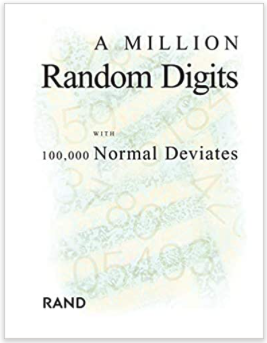

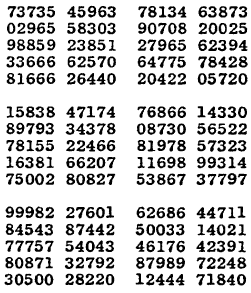

Een random seed stel je in met de **random.seed** functie.
- Als er een getal als argument meegegeven word, dan zal je iedere keer dat je je programma runt, dezelfde rij random getallen krijgen.
- Als je geen getal meegeeft dan word de huidige tijd (op milliseconde niveau) als seed gebruikt, en zijn je resultaten bij iedere run anders.

In [69]:
# Vier trekkingen uit een
# uniforme verdeling op [0,1]
# met random seed.
random.seed(42)
print(random.uniform(0,1))
print(random.uniform(0,1))
print(random.uniform(0,1))
print(random.uniform(0,1))

0.6394267984578837
0.025010755222666936
0.27502931836911926
0.22321073814882275


In [70]:
# Vier trekkingen uit een
# uniforme verdeling op [0,1]
# zonder random seed.
random.seed()
print(random.uniform(0,1))
print(random.uniform(0,1))
print(random.uniform(0,1))
print(random.uniform(0,1))

0.2875327822255146
0.7816724853586967
0.2543436242441067
0.7273947834477216


## Zelf functies schrijven

Net zoals je in de wiskunde een functie $f$ kan definieren:
$$
f(x) = x^2 - 2x + 1
$$
kan je in je programmacode ook functies definieren.

In [71]:
def f(x):
    a = x**2
    b = 2*x
    return a - b + 1

print(f"""
Laat y = f(x),
als x = 0 dan is y = {f(0)},
als x = 1 dan is y = {f(1)},
als x = 2 dan is y = {f(2)},
als x = 3 dan is y = {f(3)}.
""")


Laat y = f(x),
als x = 0 dan is y = 1,
als x = 1 dan is y = 0,
als x = 2 dan is y = 1,
als x = 3 dan is y = 4.



In [72]:
def f(x):
    a = x**2
    b = 2*x
    return a - b + 1

- **def** geeft aan dat hier een functie gedefinieerd word
- de naam van de functie is **f**
- de functie heeft een **invoer argument**, de variabele **x**
- de volgende drie ingesprongen regels zijn de code die bij de functie hoort
- het **return** commando geeft de uitvoer van de functie

In [73]:
def f(x):
    a = x**2
    b = 2*x
    return a - b + 1

x = 4
y = f(3)
print(x)
print(a)

4
5


Er is een onderscheid tussen variabelen gedefinieerd *binnen* de functie **f**, en de variabelen daarbuiten.
- **a** en **b** zijn alleen gedefinieerd *binnen* de functie **f**. 
- Bij uitvoer van de regel **y = f(3)** heeft **x** binnen de functie de waarde 3.
- Buiten **f** heeft **x** de waarde 4.

In [74]:
def f(x):
    a = x**2
    b = 2*x
    return a - b + 1

a = 5
x = f(a)
print(x, a)

16 5


Het idee is dat de aanroeper van de functie afgeschermed is van de implementatie van de functie. Je zou een functie los van de rest van het programma moeten kunnen schrijven, gebruiken en testen.

In [75]:
def abc_formule(a, b, c):
    disc = b*b - 4*a*c
    # TO DO -- controleren of de
    # discriminant positief is
    x1 = (-b + disc**(1/2))/(2*a)
    x2 = (-b - disc**(1/2))/(2*a)
    print(f"""
    De vergelijking
      {a}x^2 {b:+}x {c:+} = 0
    heeft twee oplossingen:
    x1 = {x1}, en
    x2 = {x2}
    """)

abc_formule(1, 2, -5)
abc_formule(2, -12, 4)


    De vergelijking
      1x^2 +2x -5 = 0
    heeft twee oplossingen:
    x1 = 1.4494897427831779, en
    x2 = -3.449489742783178
    

    De vergelijking
      2x^2 -12x +4 = 0
    heeft twee oplossingen:
    x1 = 5.645751311064591, en
    x2 = 0.3542486889354093
    


- Voor naamgeving van functies gelden dezelfde regels als voor variabelen.
- Deze functie heeft 3 invoer argumenten, **a**, **b** en **c**.
- De functie heeft *geen* uitvoer en ook geen **return**.
- In plaats daarvan **print** de functie zijn resultaat.

Functies kunnen ook andere functies aanroepen. Zo kan je een groter probleem in verschillende brokjes opsplitsen.

In [76]:
def discriminant(a, b, c):
    return b*b - 4*a*c

def vergelijking(a, b, c):
    return f"{a}x^2 {b:+}x {c:+} = 0"

def tekst_oplossingen(s, x1, x2):
    return f"""
    De vergelijking
      {s}
    heeft twee oplossingen:
    x1 = {x1}, en
    x2 = {x2}
    """

In [77]:
def abc_formule(a, b, c):
    s = vergelijking(a, b, c)
    disc = discriminant(a, b, c)
    # TO DO -- controleren of de
    # discriminant positief is
    x1 = (-b + disc**(1/2))/(2*a)
    x2 = (-b - disc**(1/2))/(2*a)
    print(tekst_oplossingen(s, x1, x2))
    
abc_formule(1, 2, -5)


    De vergelijking
      1x^2 +2x -5 = 0
    heeft twee oplossingen:
    x1 = 1.4494897427831779, en
    x2 = -3.449489742783178
    


Als een functie definitie begint met een (multiline) string, dan heet dit een **docstring**. Deze word niet uitgevoerd door de functie maar is beschikbaar via het **help** commando.

In [78]:
def groet(naam, n):
    """Begroet de aanroeper n keer.
    
    Argumenten:
      naam -- Naam die in de groet gebruikt word.
      n -- Aantal keer dat de aanroeper begroet word.
    """
    print(f"Hallo {naam}!\n"*n)
    
groet("Robert", 3)
help(groet)

Hallo Robert!
Hallo Robert!
Hallo Robert!

Help on function groet in module __main__:

groet(naam, n)
    Begroet de aanroeper n keer.
    
    Argumenten:
      naam -- Naam die in de groet gebruikt word.
      n -- Aantal keer dat de aanroeper begroet word.



## Opgaven met functies

- Tot nu toe waren meeste opgaven van de vorm: "schrijf een programma dat ..."
  - Het programma vraagt invoer via het **input** commando
  - Het programma geeft uitvoer met het **print** commando
  - Je test het programma door het uit te voeren
- Nu zal je ook opgaven van de vorm: "schrijf een functie die ..."
  - De functie krijgt invoer via zijn invoerargumenten
  - De functie geeft zijn uitvoer via het **return** commando
  - Soms **print** de functie ook nog wat
  - Je zult een los stukje code met een functieaanroep moeten schrijven om je functie te testen, deze is strict gesproken niet onderdeel van de opdracht.
  
Let op dit onderscheid bij het maken van opgaven (en bij het tentamen!)

## Programmeerstijl

- Structuur code:
  1. (in Spyder) docstring (naam programmeur, datum)
  2. **import** en **from** ... **import** ...
  3. Functiedefinities
  4. **seed**
  5. Rest code
- Importeer alleen functies en packages die je daadwerkelijk in je code gebruikt   

## Programmeerstijl

- Als je random functies gebruikt, gebruik dan altijd een *seed*.
- Functies maken alleen gebruik van hun argumenten, en niet van variabelen die daarbuiten zijn gedefinieerd.
  - Uitzondering: constanten ($\pi$, $e$, etc...)
- Naamgeving functies:
  - Zelfde regels als voor namen van variabelen
  - Naam van een functie met uitvoer beschrijft de uitvoer

## Programmeerstijl

- Alle functies hebben een docstring
  - Korte beschrijving wat de functie doet
  - Beschrijving invoer argumenten
  - Beschrijf evt. uitvoer